In [101]:
#pip install python-dotenv

In [20]:
# Install required libraries
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

In [9]:
!pip install -q datasets transformers sentence_transformers faiss-gpu

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


In [100]:
import os
from dotenv import load_dotenv

load_dotenv()

HF_ACCESS_TOKEN = os.getenv('HF_ACCESS_TOKEN')


In [102]:
from datasets import load_dataset

dataset = load_dataset('json', data_files='#//piano_music_data.json')
dataset

DatasetDict({
    train: Dataset({
        features: ['response', 'instruction'],
        num_rows: 1823
    })
})

In [103]:
dataset["train"]

Dataset({
    features: ['response', 'instruction'],
    num_rows: 1823
})

In [104]:
dataset["train"].to_pandas()

,response,instruction
0,A C major chord is constructed with a root (C)...,What is a C major chord?
1,"The C major chord consists of three notes: C, ...",How many notes make up the C major chord?
2,"For the left hand, the fingerings are little f...",What are the fingerings for playing a C major ...
3,"For the right hand, the fingerings are thumb (...",What are the fingerings for playing a C major ...
4,C/E is the first inversion of the C major chor...,"What does C/E signify in chord inversions, and..."
...,...,...
1818,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1819,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1820,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1821,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...


# 05. Analyze the Dataset

In [84]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

In [105]:
instruction_tokens_count = [len(tokenizer.tokenize(example["instruction"])) for example in dataset["train"]]
print("Instruction Tokens Count", instruction_tokens_count)

Instruction Tokens Count [8, 11, 20, 20, 20, 20, 19, 19, 19, 19, 8, 11, 20, 20, 22, 21, 21, 21, 20, 20, 10, 13, 20, 20, 21, 21, 22, 11, 12, 21, 21, 23, 22, 23, 11, 13, 22, 22, 23, 23, 23, 12, 13, 17, 10, 11, 20, 20, 21, 21, 21, 11, 12, 21, 21, 23, 22, 22, 10, 11, 20, 20, 13, 10, 11, 12, 9, 18, 11, 12, 13, 10, 18, 11, 13, 14, 11, 17, 11, 12, 13, 10, 12, 13, 14, 11, 15, 12, 14, 15, 12, 21, 8, 11, 9, 20, 20, 8, 11, 9, 16, 9, 12, 10, 17, 9, 10, 14, 14, 17, 22, 22, 12, 17, 17, 17, 17, 10, 15, 13, 15, 15, 15, 11, 16, 14, 16, 16, 16, 9, 14, 12, 10, 15, 13, 9, 9, 18, 15, 16, 10, 19, 16, 17, 11, 20, 17, 23, 24, 9, 15, 14, 10, 16, 15, 9, 15, 14, 10, 16, 15, 8, 13, 16, 16, 8, 13, 16, 16, 8, 13, 12, 9, 14, 13, 10, 15, 14, 8, 13, 12, 9, 14, 13, 9, 18, 15, 21, 10, 19, 16, 22, 11, 20, 17, 23, 10, 19, 16, 22, 9, 18, 15, 16, 8, 9, 16, 14, 8, 9, 16, 15, 8, 9, 16, 15, 8, 9, 16, 15, 9, 10, 17, 16, 10, 11, 18, 17, 9, 13, 10, 8, 12, 9, 10, 14, 11, 9, 10, 8, 9, 16, 9, 10, 8, 9, 16, 15, 8, 9, 16, 15, 8, 9, 16

In [106]:
output_tokens_count = [len(tokenizer.tokenize(example["response"])) for example in dataset["train"]]
print("Output Tokens Count", output_tokens_count)
print("Length of the Output Tokens Count", len(output_tokens_count))

Output Tokens Count [26, 17, 24, 24, 35, 35, 37, 37, 37, 37, 27, 17, 24, 24, 37, 36, 39, 39, 38, 38, 44, 20, 29, 29, 39, 39, 41, 46, 21, 29, 29, 42, 41, 43, 45, 21, 29, 29, 42, 42, 42, 67, 23, 29, 41, 19, 29, 29, 38, 38, 48, 43, 20, 29, 29, 41, 40, 40, 45, 14, 24, 24, 29, 82, 33, 41, 42, 72, 73, 23, 44, 43, 72, 48, 23, 45, 42, 65, 57, 29, 48, 47, 54, 26, 51, 54, 51, 61, 61, 43, 65, 70, 50, 18, 30, 32, 31, 48, 18, 28, 70, 71, 21, 17, 86, 43, 30, 35, 36, 70, 44, 45, 37, 84, 42, 42, 42, 36, 87, 20, 34, 33, 34, 58, 94, 24, 39, 38, 39, 44, 88, 20, 46, 96, 21, 55, 57, 50, 48, 44, 48, 53, 45, 47, 53, 56, 46, 48, 45, 41, 30, 53, 34, 33, 89, 45, 32, 79, 55, 37, 95, 46, 69, 93, 93, 45, 77, 111, 106, 43, 85, 69, 53, 102, 98, 47, 87, 77, 42, 87, 73, 48, 96, 90, 45, 46, 48, 53, 50, 49, 43, 68, 50, 58, 44, 40, 53, 37, 47, 39, 45, 58, 41, 49, 43, 28, 68, 23, 50, 27, 67, 94, 45, 26, 67, 94, 51, 34, 93, 73, 50, 34, 94, 76, 51, 37, 97, 82, 75, 42, 43, 78, 40, 43, 78, 48, 73, 52, 30, 59, 29, 68, 59, 37, 

In [107]:
#Combine the Instruction Token Count and the Output Token Count
combine_tokens_count = [instruction + response  for instruction, response in zip(instruction_tokens_count, output_tokens_count)]
print("Combine Tokens Count", combine_tokens_count)
print("Length of the Combine Tokens Count", len(combine_tokens_count))

Combine Tokens Count [34, 28, 44, 44, 55, 55, 56, 56, 56, 56, 35, 28, 44, 44, 59, 57, 60, 60, 58, 58, 54, 33, 49, 49, 60, 60, 63, 57, 33, 50, 50, 65, 63, 66, 56, 34, 51, 51, 65, 65, 65, 79, 36, 46, 51, 30, 49, 49, 59, 59, 69, 54, 32, 50, 50, 64, 62, 62, 55, 25, 44, 44, 42, 92, 44, 53, 51, 90, 84, 35, 57, 53, 90, 59, 36, 59, 53, 82, 68, 41, 61, 57, 66, 39, 65, 65, 66, 73, 75, 58, 77, 91, 58, 29, 39, 52, 51, 56, 29, 37, 86, 80, 33, 27, 103, 52, 40, 49, 50, 87, 66, 67, 49, 101, 59, 59, 59, 46, 102, 33, 49, 48, 49, 69, 110, 38, 55, 54, 55, 53, 102, 32, 56, 111, 34, 64, 66, 68, 63, 60, 58, 72, 61, 64, 64, 76, 63, 71, 69, 50, 45, 67, 44, 49, 104, 54, 47, 93, 65, 53, 110, 54, 82, 109, 109, 53, 90, 127, 122, 51, 98, 81, 62, 116, 111, 57, 102, 91, 50, 100, 85, 57, 110, 103, 54, 64, 63, 74, 60, 68, 59, 90, 61, 78, 61, 63, 63, 56, 63, 61, 54, 76, 56, 65, 51, 37, 84, 37, 58, 36, 83, 109, 53, 35, 83, 109, 59, 43, 109, 88, 59, 44, 111, 92, 61, 48, 115, 99, 84, 55, 53, 86, 52, 52, 88, 62, 84, 61, 40,

In [108]:
dataset

DatasetDict({
    train: Dataset({
        features: ['response', 'instruction'],
        num_rows: 1823
    })
})

In [109]:
dataset["train"].to_pandas()

,response,instruction
0,A C major chord is constructed with a root (C)...,What is a C major chord?
1,"The C major chord consists of three notes: C, ...",How many notes make up the C major chord?
2,"For the left hand, the fingerings are little f...",What are the fingerings for playing a C major ...
3,"For the right hand, the fingerings are thumb (...",What are the fingerings for playing a C major ...
4,C/E is the first inversion of the C major chor...,"What does C/E signify in chord inversions, and..."
...,...,...
1818,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1819,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1820,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1821,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...


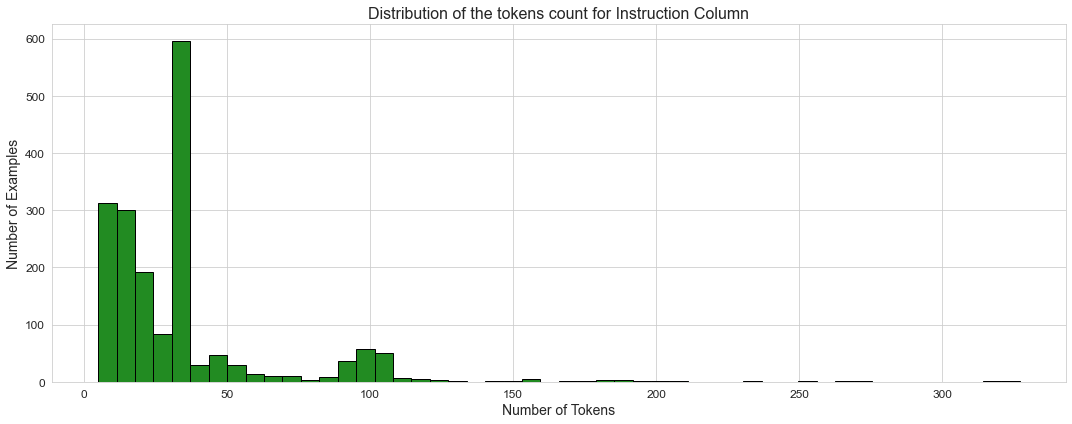

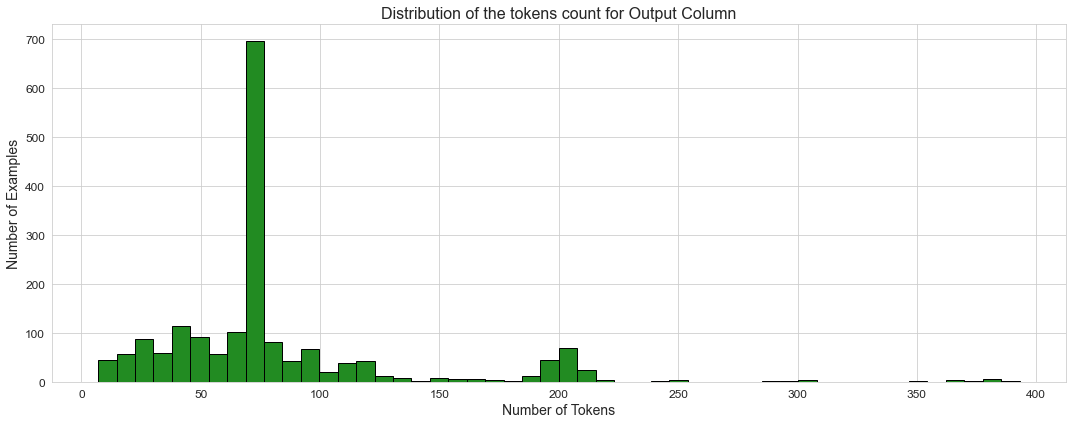

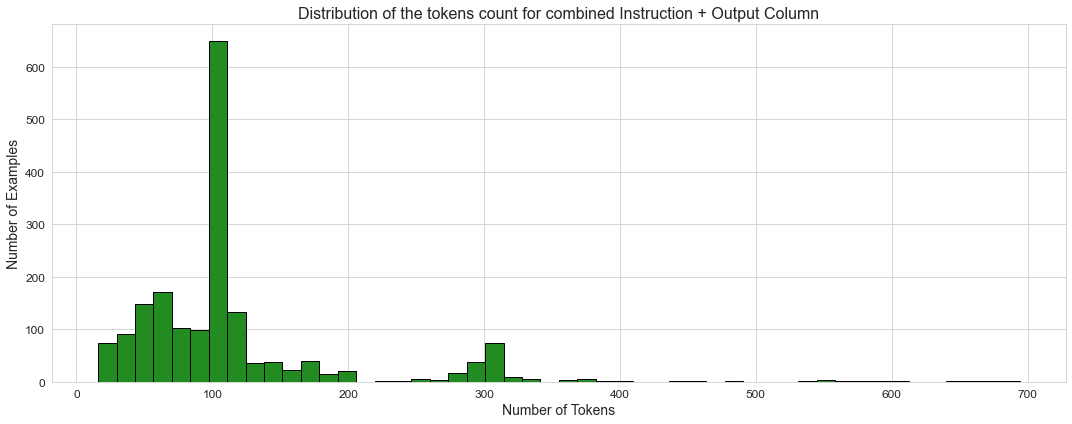

In [110]:
# Create a Histogram using the Matplotlib Library to see the distribution of our token counts
def plot_distribution(tokens_count, title):
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 6))
  plt.hist(tokens_count, bins=50, color='#228B22', edgecolor='black')
  plt.title(title, fontsize=16)
  plt.xlabel("Number of Tokens", fontsize=14)
  plt.ylabel("Number of Examples", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.tight_layout()
  plt.show()

#Insruction Tokens Count
plot_distribution(instruction_tokens_count, "Distribution of the tokens count for Instruction Column")
#Output Tokens Count
plot_distribution(output_tokens_count, "Distribution of the tokens count for Output Column")
#Combine Tokens Count
plot_distribution(combine_tokens_count, "Distribution of the tokens count for combined Instruction + Output Column")
#The mean is around 100 tokens but there is a long tail distribution which goes up to 400 tokens

In [91]:
dataset

DatasetDict({
    train: Dataset({
        features: ['response', 'instruction'],
        num_rows: 1823
    })
})

In [92]:
dataset["train"].to_pandas()

,response,instruction
0,A C major chord is constructed with a root (C)...,What is a C major chord?
1,"The C major chord consists of three notes: C, ...",How many notes make up the C major chord?
2,"For the left hand, the fingerings are little f...",What are the fingerings for playing a C major ...
3,"For the right hand, the fingerings are thumb (...",What are the fingerings for playing a C major ...
4,C/E is the first inversion of the C major chor...,"What does C/E signify in chord inversions, and..."
...,...,...
1818,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1819,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1820,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...
1821,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...


In [93]:
def transform_data(example):
    # Formatting the new 'text' field as specified
    example['text'] = f"<s>[INST] {example['instruction']} [/INST] {example['response']} </s>"
    return example

In [111]:
def chat_template(example):
    # You need to specify a key where the formatted string will be stored, for example, "formatted"
    example["chat"] = f"Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\n{example['instruction']}\n\n### Response:\n{example['response']}"
    return example

In [112]:
transformed_dataset = dataset.map(chat_template)

Map:   0%|          | 0/1823 [00:00<?, ? examples/s]

In [113]:
transformed_dataset["train"].to_pandas()

,response,instruction,chat
0,A C major chord is constructed with a root (C)...,What is a C major chord?,### Instruction:\nWhat is a C major chord?\n\n...
1,"The C major chord consists of three notes: C, ...",How many notes make up the C major chord?,### Instruction:\nHow many notes make up the C...
2,"For the left hand, the fingerings are little f...",What are the fingerings for playing a C major ...,### Instruction:\nWhat are the fingerings for ...
3,"For the right hand, the fingerings are thumb (...",What are the fingerings for playing a C major ...,### Instruction:\nWhat are the fingerings for ...
4,C/E is the first inversion of the C major chor...,"What does C/E signify in chord inversions, and...",### Instruction:\nWhat does C/E signify in cho...
...,...,...,...
1818,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...,### Instruction:\nCreate a melody from a chord...
1819,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...,### Instruction:\nCreate a melody from a chord...
1820,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...,### Instruction:\nCreate a melody from a chord...
1821,X:1\nT:Extracted Chord Progression\nM:4/4\nL:1...,Create a melody from a chord sequence of C#-mi...,### Instruction:\nCreate a melody from a chord...


In [98]:
import os
os.environ["HF_TOKEN"] = "#"

In [114]:
transformed_dataset.push_to_hub("data_piano")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mudassar93/data_piano/commit/1d36c62a9e66621c5d06250a54abdf6fb701d695', commit_message='Upload dataset', commit_description='', oid='1d36c62a9e66621c5d06250a54abdf6fb701d695', pr_url=None, pr_revision=None, pr_num=None)